In [36]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import scipy.stats as st
import numpy as np
import re
#from sklearn import datasets


from scipy.stats import linregress

#%matplotlib notebook

#import packages
import csv


In [37]:
# Reference the file where the CSV is located
indeed_data= "indeed_job_dataset.csv"

# Import the data into a Pandas DataFrame
indeed_df = pd.read_csv(indeed_data)
indeed_df

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12,Intelliswift Software Inc,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,31.0,3.7,...,0,0,0,0,0,0,0,0,0,1
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,3.9,...,0,0,0,1,0,0,1,0,0,0
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4.0,...,0,0,0,0,0,0,1,0,0,0


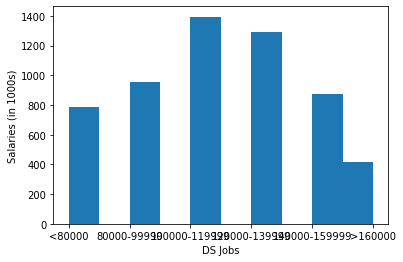

In [56]:
plt.hist(indeed_df['Queried_Salary'])
plt.xlabel('DS Jobs')
plt.ylabel('Salaries (in 1000s)')
plt.show()

In [38]:
# Identifying job descriptions that hold keywords 
# How did we choose these keywords? Based on programming languages we are learning and will learn 
# code source: https://codereview.stackexchange.com/questions/179039/searching-for-keywords-in-dataframe
p = 'python'
for row in indeed_df:
    indeed_df['python'] = indeed_df.astype(str).sum(axis=1).str.contains(p)
# notes from code source: "In my limited experience, for loops are almost always wrong when using Pandas. 
# The primary benefit of Pandas is vectorization, so using the built-in methods is typically best."
indeed_df.head(50)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,...,1,0,0,0,0,0,0,0,0,0
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,...,0,0,0,0,0,0,0,0,0,1
7,7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,<80000,data_scientist,"['Machine Learning', 'R', 'SQL']",3,OM Partners,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,0,0,0,1,0,0,0,0,0,1
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,...,0,0,0,1,0,0,0,0,0,1


In [53]:
# Identifying job descriptions that hold keywords 
# How did we choose these keywords? Based on programming languages we are learning and will learn 
# code source: https://codereview.stackexchange.com/questions/179039/searching-for-keywords-in-dataframe
p = 'Python'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Python"] = True
indeed_df.head(50)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,1,0,0,0,1,0,0,NaN
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,True
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,1,0,0,0,0,0,0,True
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,1,0,0,0,0,0,0,0,1,NaN
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,1,0,0,0,NaN
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,...,0,0,0,0,0,0,0,0,0,NaN
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,...,0,0,0,0,0,0,0,0,1,True
7,7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,<80000,data_scientist,"['Machine Learning', 'R', 'SQL']",3,OM Partners,NaN,NaN,...,0,0,1,0,0,0,0,0,0,NaN
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,0,0,1,0,0,0,0,0,1,True
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,...,0,0,1,0,0,0,0,0,1,True


In [55]:
indeed_df['Company'].unique()

array(['Express Scripts', 'Money Mart Financial Services', 'comScore',
       ..., 'Glooko', 'Coda Search', 'Intelliswift Software Inc'],
      dtype=object)

In [49]:
indeed_df['python'].value_counts()

Series([], Name: python, dtype: int64)

In [46]:
indeed_df['Queried_Salary'].unique()

array(['<80000', '80000-99999', '100000-119999', '120000-139999',
       '140000-159999', '>160000'], dtype=object)

In [47]:
indeed_df.columns

Index(['Unnamed: 0', 'Job_Title', 'Link', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'No_of_Reviews', 'No_of_Stars',
       'Date_Since_Posted', 'Description', 'Location', 'Company_Revenue',
       'Company_Employees', 'Company_Industry', 'python', 'sql',
       'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC', 'NC',
       'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

In [40]:
# Create a dataframe of jobs that have python in the job description
python_df = indeed_df.loc[indeed_df["python"]==True]
python_df
# Print the job descriptions in order to ensure quality of the finds
# for row in python_df:
#     print(python_df['job_description'])

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,0,0,0,1,0,0,0,0,0,1
14,14,Data Scientist,https://www.indeed.com/rc/clk?jk=ba1b24901c041...,<80000,data_scientist,"['TensorFlow', 'Project Planning', 'Linux', 'M...",7,Catalina Marketing,81.0,3.2,...,0,0,0,1,1,0,0,0,0,0
29,29,Data Analysis & Machine Learning Postdoctoral ...,https://www.indeed.com/rc/clk?jk=fbe8ba212a66f...,<80000,data_scientist,"['TensorFlow', 'Machine Learning', 'Git', 'Pyt...",5,Lawrence Livermore National Laboratory,111.0,4.3,...,0,0,0,0,0,0,0,0,0,1
57,57,Data Scientist,https://www.indeed.com/rc/clk?jk=5e5f660fe4f20...,80000-99999,data_scientist,"['.Net', 'Data Mining', 'C#', 'Machine Learnin...",8,Microsoft,5178.0,4.2,...,0,0,0,0,0,1,0,0,0,0
65,65,Data Scientist,https://www.indeed.com/rc/clk?jk=4b36b4e1cdb8a...,80000-99999,data_scientist,"['Machine Learning', 'R', 'SAS', 'Python', 'SQL']",5,Wunderman,197.0,3.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5556,5556,Data Engineer,https://www.indeed.com/rc/clk?jk=bf4628360b422...,140000-159999,data_engineer,"['Machine Learning', 'Hadoop', 'Scala', 'Kafka...",9,Harnham,6.0,4.8,...,0,0,0,0,1,0,0,0,0,0
5610,5610,Principal Cloud Data Engineer/Architect,https://www.indeed.com/rc/clk?jk=20c8a60f9b4cf...,140000-159999,data_engineer,"['Hadoop', 'Scala', 'Kafka', 'Compliance Manag...",14,Discover Financial Services,1948.0,4.0,...,0,0,0,0,0,0,1,0,0,0
5678,5678,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=01256f05fb1d9...,>160000,data_engineer,"['Spark', 'Scripting', 'Kafka', 'Python', 'AWS']",5,Harnham,6.0,4.8,...,0,0,0,0,1,0,0,0,0,0
5709,5709,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=d701a3a542966...,>160000,data_engineer,"['Ruby', 'Hadoop', 'Scala', 'R', 'Perl', 'SAS'...",12,Stride Search,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [41]:
indeed_df['python'].value_counts()

False    5564
True      151
Name: python, dtype: int64

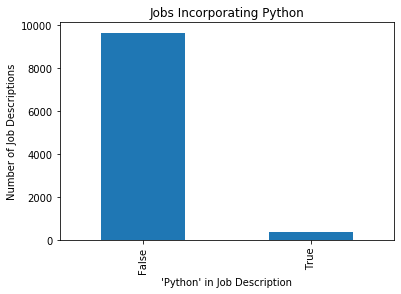

In [9]:
# Create a bar chart showing the number of job descriptions incorporating "Python"
python_plot = it_data_df['python'].value_counts().plot(kind='bar')
plt.title("Jobs Incorporating Python")
plt.xlabel("'Python' in Job Description")
plt.ylabel("Number of Job Descriptions")
plt.savefig("Py_TF_Bars", bbox_inches='tight')
# The data shows a small amount of job descriptions incoporate "Python"
# This may show it is a more specialized skill within the field

In [10]:
# Identifying job descriptions that hold keywords 
# How did we choose these keywords? Based on programming languages we are learning and will learn 
# code source: https://codereview.stackexchange.com/questions/179039/searching-for-keywords-in-dataframe
p = 'excel'
for row in it_data_df:
    it_data_df['excel'] = it_data_df.astype(str).sum(axis=1).str.contains(p)
# notes from code source: "In my limited experience, for loops are almost always wrong when using Pandas. 
# The primary benefit of Pandas is vectorization, so using the built-in methods is typically best."
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,python,excel
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False,True
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,False,False
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False,False
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,$100k - 135k | Equity,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,False
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,False
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,False,True
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,False


In [11]:
# Identifying job descriptions that hold keywords 
# How did we choose these keywords? Based on programming languages we are learning and will learn 
# code source: https://codereview.stackexchange.com/questions/179039/searching-for-keywords-in-dataframe
p = 'Excel'
for row in it_data_df:
    it_data_df['Excel'] = it_data_df.astype(str).sum(axis=1).str.contains(p)
# notes from code source: "In my limited experience, for loops are almost always wrong when using Pandas. 
# The primary benefit of Pandas is vectorization, so using the built-in methods is typically best."
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,python,excel,Excel
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False,True,False
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,False,False,False
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False,False,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False,False,False
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,False,False
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,False,True,False
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True


In [12]:
# Identifying job descriptions that hold keywords 
# How did we choose these keywords? Based on programming languages we are learning and will learn 
# code source: https://codereview.stackexchange.com/questions/179039/searching-for-keywords-in-dataframe
p = 'Microsoft Excel'
for row in it_data_df:
    it_data_df['MS Excel'] = it_data_df.astype(str).sum(axis=1).str.contains(p)
# notes from code source: "In my limited experience, for loops are almost always wrong when using Pandas. 
# The primary benefit of Pandas is vectorization, so using the built-in methods is typically best."
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,python,excel,Excel,MS Excel
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False,True,False,False
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,False,False,False,False
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False,False,False,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False,False,False,False
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,False,False,False
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,False
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,False,True,False,False
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,False


In [13]:
it_data_df['excel'].value_counts()

False    8476
True     1524
Name: excel, dtype: int64

In [14]:
it_data_df['Excel'].value_counts()

False    7080
True     2920
Name: Excel, dtype: int64

In [15]:
it_data_df['MS Excel'].value_counts()

False    9890
True      110
Name: MS Excel, dtype: int64

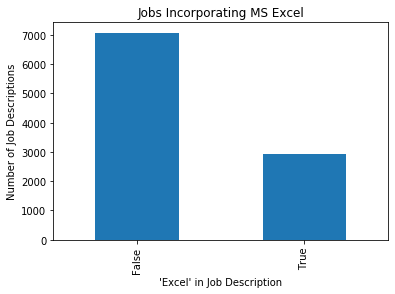

In [16]:
# source https://stackoverflow.com/questions/32428193/saving-matplotlib-graphs-to-image-as-full-screen
# Create a bar chart showing the number of job descriptions incorporating "Excel"
python_plot = it_data_df['Excel'].value_counts().plot(kind='bar')
plt.title("Jobs Incorporating MS Excel")
plt.xlabel("'Excel' in Job Description")
plt.ylabel("Number of Job Descriptions")
plt.savefig("MSExcel_TF_Bars", bbox_inches='tight')
# The data shows a small amount of job descriptions incoporate "Python"
# This may show it is a more specialized skill within the field

In [17]:
p = 'java'
for row in it_data_df:
    it_data_df['java'] = it_data_df.astype(str).sum(axis=1).str.contains(p)

it_data_df.head(50)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,python,excel,Excel,MS Excel,java
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False,True,False,False,False
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,False,False,False,False,False
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False,False,False,False,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False,False,False,False,False
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,False,False,True,False,False
5,2019-02-06 05:36:06 +0000,https://www.indeed.com/viewjob?jk=14fa3772cd5f...,CIB – Fixed Income Research – Machine Learning...,Accounting/Finance,JP Morgan Chase,New York,NY 10179 (Midtown area),Usa,New york,New york,...,1549436429033307,NaN,NaN,9571ec617ba209fd9a4f842973a4e9c8,NaN,True,True,True,False,False
6,2019-02-06 05:34:37 +0000,https://www.indeed.com/viewjob?jk=c6db96b37f8a...,"Data Scientist, Licensing Operations",Accounting/Finance,Spotify,New York,NY 10011 (Chelsea area),Usa,New york,New york,...,1549436429042348,NaN,NaN,0ec629c03f3e82651711f2626c23cadb,NaN,False,True,False,False,False
7,2019-02-06 05:52:12 +0000,https://www.dice.com/jobs/detail/Sr.-Data-Scie...,Sr. Data Scientist (Can work on Xoriant W2),NaN,Xoriant Corporation,Santa Clara,CA,Usa,Santa clara,California,...,1549436429042523,NaN,NaN,972e897473d65f34b8e7f1c1b4c74b1c,NaN,False,False,True,False,False
8,2019-02-06 05:34:18 +0000,https://www.indeed.com/viewjob?jk=0fc298b9f3a8...,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,1549436429066810,NaN,NaN,80d64b46bc7c89602f63daf06b9f1b4c,NaN,False,False,False,False,False
9,2019-02-06 06:03:55 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Adroit Resources,San Francisco,CA,Usa,San francisco,California,...,1549436429884667,NaN,NaN,b772c6ef8ee7631895ab9a59b5e8b2c1,NaN,False,False,False,False,False


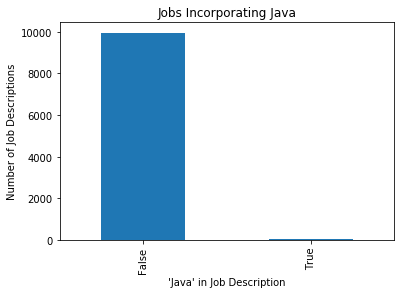

In [18]:
# Create a bar chart showing the number of job descriptions incorporating "Python"
java_plot = it_data_df['java'].value_counts().plot(kind='bar')
plt.title("Jobs Incorporating Java")
plt.xlabel("'Java' in Job Description")
plt.ylabel("Number of Job Descriptions")
plt.savefig("Java_TF_Bars", bbox_inches='tight')

In [26]:
p = 'machine learning'
for row in it_data_df:
    it_data_df['machine learning'] = it_data_df.astype(str).sum(axis=1).str.contains(p)





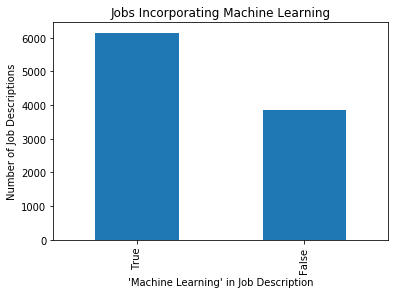

In [27]:
# Create a plot showing the amount of job descriptions incoporating the phrase "Machine Learning"
ml_plot = it_data_df['machine learning'].value_counts().plot(kind='bar')
plt.title("Jobs Incorporating Machine Learning")
plt.xlabel("'Machine Learning' in Job Description")
plt.ylabel("Number of Job Descriptions")
plt.savefig("ML_TF_Bars", bbox_inches='tight')

In [23]:
p = 'SQL'
for row in it_data_df:
    it_data_df['SQL'] = it_data_df.astype(str).sum(axis=1).str.contains(p)

it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,contact_phone_number,uniq_id,html_job_description,python,excel,Excel,MS Excel,java,machine learning,SQL
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False,True,False,False,False,True,True
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,NaN,741727428839ae7ada852eebef29b0fe,NaN,False,False,False,False,False,False,True
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False,False,False,False,False,True,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False,False,False,False,False,True,True
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,NaN,445652a560a5441060857853cf267470,NaN,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,False,False,False,False,True,False
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,False,False,True,True
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,False,True,False,False,False,False,False
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,False,False,True,True


In [25]:
it_data_df['SQL'].value_counts()

True     5743
False    4257
Name: SQL, dtype: int64

In [28]:
it_data_df['machine learning'].value_counts()

True     6149
False    3851
Name: machine learning, dtype: int64

In [29]:
p = 'Tableau'
for row in it_data_df:
    it_data_df['Tableau'] = it_data_df.astype(str).sum(axis=1).str.contains(p)

it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,uniq_id,html_job_description,python,excel,Excel,MS Excel,java,machine learning,SQL,Tableau
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False,True,False,False,False,True,True,True
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,741727428839ae7ada852eebef29b0fe,NaN,False,False,False,False,False,False,True,False
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False,False,False,False,False,True,False,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False,False,False,False,False,True,True,False
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,445652a560a5441060857853cf267470,NaN,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,False,False,False,False,True,False,False
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,False,False,True,True,False
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,b980054dbb6d3fe1c6a421a237d1495f,NaN,False,True,False,False,False,False,False,True
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,False,False,True,True,False


In [30]:
it_data_df['Tableau'].value_counts()

False    7859
True     2141
Name: Tableau, dtype: int64

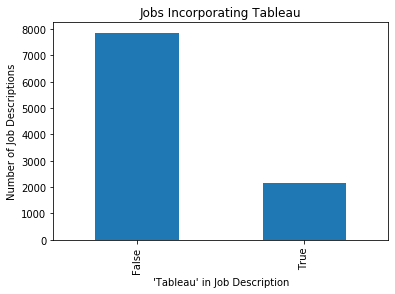

In [31]:
# Create a plot showing the amount of job descriptions incoporating the phrase "Machine Learning"
ml_plot = it_data_df['Tableau'].value_counts().plot(kind='bar')
plt.title("Jobs Incorporating Tableau")
plt.xlabel("'Tableau' in Job Description")
plt.ylabel("Number of Job Descriptions")
plt.savefig("Tableau_Bars", bbox_inches='tight')

In [ ]:
# Create a plot showing the number of jobs incorporating the phrase "SQL" over those that do not
sql_plot = it_data_df['SQL'].value_counts().plot(kind='bar')
plt.title("Jobs Incorporating SQL")
plt.xlabel("'SQL' in Job Description")
plt.ylabel("Number of Job Descriptions")
plt.savefig("SQL_TF_Bars", bbox_inches='tight')

In [ ]:
it_data_df

In [ ]:
pythons = it_data_df['python'].value_counts()
javas = it_data_df['java'].value_counts()
machines = it_data_df['machine learning'].value_counts()
it_data_df.plot(y=pythons, javas, machines)

In [ ]:
machine = it_data_df["machine learning"]==True

machine_learning_df = it_data_df[machine]

In [ ]:
machine_plot = it_data_df['machine learning'].value_counts().plot(kind='bar')

In [ ]:
# Create a dataframe of jobs that have both "python" and "java" in the job description
python = indeed_df["python"]==True
java = indeed_df["java"]==True


ideal_df = it_data_df[python & java & machine]
ideal_df

In [ ]:
it_data_df[['python','java','machine learning']].plot(kind='bar')

plt.show()

In [ ]:
ideal_df.plot(x="X", y=["A", "B", "C"], kind="bar")

In [ ]:
# create data frame of companies showing "java" + "python" in job description
# then plot out in pie chart to show the diversity of the types of companies
companies_df = pd.DataFrame({'company name': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = ideal_df.plot.pie(y='mass', figsize=(5, 5))

In [ ]:
# I think this returns every row because it does not distinguish "R" as a word but includes it
# within other words
p = 'R'
for row in it_data_df:
    it_data_df['R'] = it_data_df.astype(str).sum(axis=1).str.contains(p)

it_data_df

In [ ]:
python_jobs = []

for i, j in it_data_df.iterrows():
    i = 
    p = 'python'
    if p in j['job_type']:
        python_jobs.append({})
it_data_df   

#  name = weather_json["name"]
#         temperature = weather_json["main"]["temp"]
#  metrics.append({"name": name,
#                         "temperature": temperature,

In [ ]:
data_sc = it_data_df.groupby('job_title').last()
data_sc

In [ ]:
#Find out what kind of information is in the data

for col in it_data_df.columns: 
    print(col) 



In [ ]:
total_rows = it_data_df['crawl_timestamp'].count
print (total_rows)


In [ ]:
# create a dataframe grouping by the 'job_title' column
sorted_it_df = it_data_df.groupby('job_title')
sorted_it_df.head(50)

In [ ]:
# Create a dataframe for counts of data
job_title_count = pd.DataFrame(sorted_it_df['job_title'].count())
job_title_count

In [ ]:
# job_title_count.plot(kind='bar', title="Number of data points for each Job title", color="red")

job_title_count.plot.bar()

# # Set the x and y labels
# plt.set_xlabel("job title")
# plt.set_ylabel("Number of Data Points")
#plt.tight_layout()
# Save the figure
#plt.savefig("PandaBarChart.png")

plt.show()